In [ ]:
!pip install rasterio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
%matplotlib inline 


In [ ]:
band3_1 = rasterio.open(
    "/content/drive/MyDrive/Projects/3rd-Year-Project/NDWI/Satellite Images/Hirakud Lake 2021-05-16/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B3.TIF")
band5_1 = rasterio.open(
    "/content/drive/MyDrive/Projects/3rd-Year-Project/NDWI/Satellite Images/Hirakud Lake 2021-05-16/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B6.TIF")

band3_2 = rasterio.open(
    "/content/drive/MyDrive/Projects/3rd-Year-Project/NDWI/Satellite Images/Hirakud Lake 2021-10-23/LC08_L2SP_141045_20211023_20211103_02_T1_SR_B3.TIF")
band5_2 = rasterio.open(
    "/content/drive/MyDrive/Projects/3rd-Year-Project/NDWI/Satellite Images/Hirakud Lake 2021-10-23/LC08_L2SP_141045_20211023_20211103_02_T1_SR_B6.TIF")


In [ ]:
green_1 = band3_1.read(1).astype("float32")
nir_1 = band5_1.read(1).astype("float32")

green_2 = band3_2.read(1).astype("float32")
nir_2 = band5_2.read(1).astype("float32")


In [ ]:
ndwi_1 = np.where(
    (green_1+nir_1) == 0.,
    0,
    (green_1-nir_1)/(green_1+nir_1)
)

ndwi_2 = np.where(
    (green_2+nir_2) == 0.,
    0,
    (green_2-nir_2)/(green_2+nir_2)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
ndwi_copy_1 = copy.copy(ndwi_1)
ndwi_copy_1[ndwi_1 < 0] = 0
ndwi_copy_1[ndwi_1 > 0] = -100

ndwi_copy_2 = copy.copy(ndwi_2)
ndwi_copy_2[ndwi_2 > 0] = -100

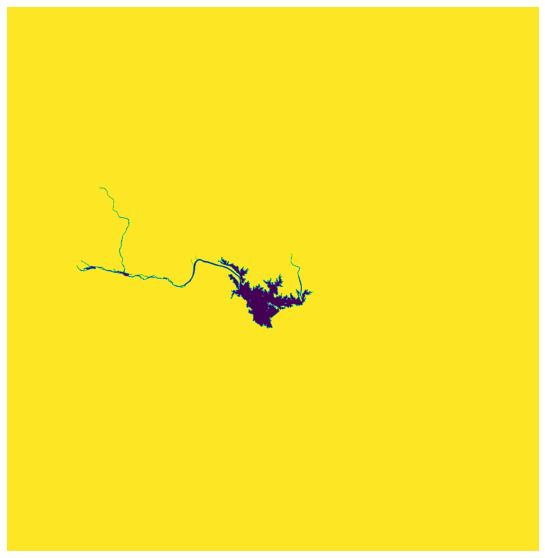

In [ ]:
img = cv2.threshold(np.uint8(ndwi_copy_1), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = max(sizes)

ndwi_components_1 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_1[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(ndwi_components_1)

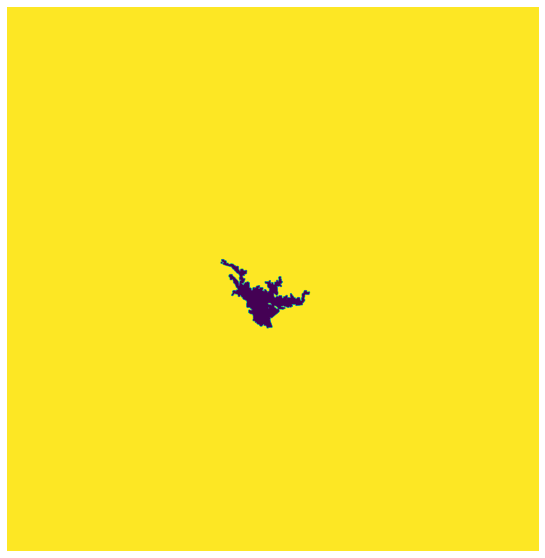

In [ ]:
img = cv2.threshold(np.uint8(ndwi_copy_1), 0, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((5,5), np.uint8)
img = cv2.erode(img, kernel, iterations=3)
img = cv2.dilate(img, kernel, iterations=5)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = max(sizes)

ndwi_components_1 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_1[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(ndwi_components_1)


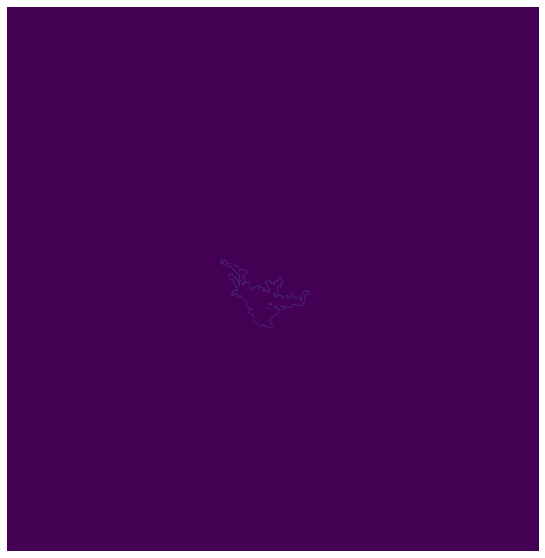

In [ ]:
ndwi_components_1 = img_to_array(ndwi_components_1)
save_img('image_save_ndwi_components_1.jpg', ndwi_components_1)
image_ndwi_components_1 = cv2.imread('image_save_ndwi_components_1.jpg')

img_blur_ndwi_components_1 = cv2.GaussianBlur(
    image_ndwi_components_1, (3, 3), 0)
canny_ndwi_components_1 = cv2.Canny(img_blur_ndwi_components_1, 240, 250)
canny_ndwi_components_image = img_to_array(canny_ndwi_components_1)
save_img("image_save_ndwi_canny_edge_1.png", canny_ndwi_components_image)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(canny_ndwi_components_1)


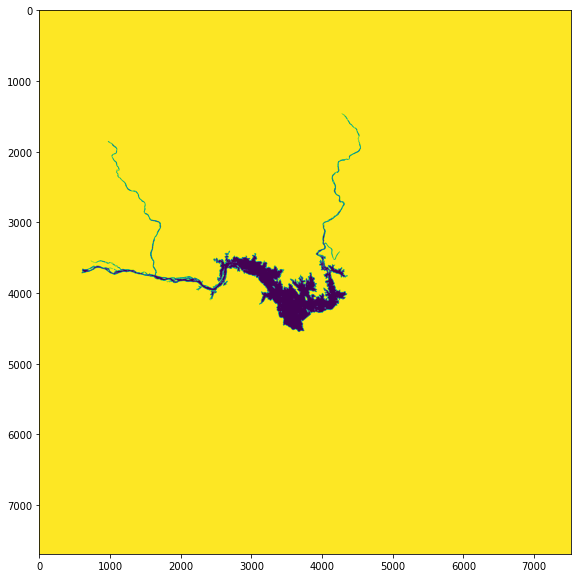

In [ ]:
img = cv2.threshold(np.uint8(ndwi_copy_2), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = max(sizes)

ndwi_components_2 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_2[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.imshow(ndwi_components_2)


In [ ]:
img = cv2.threshold(np.uint8(ndwi_copy_2), 0, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((5,5), np.uint8)
img = cv2.erode(img, kernel, iterations=4)
img = cv2.dilate(img, kernel, iterations=6)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = max(sizes)

ndwi_components_2 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_2[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(ndwi_components_2)


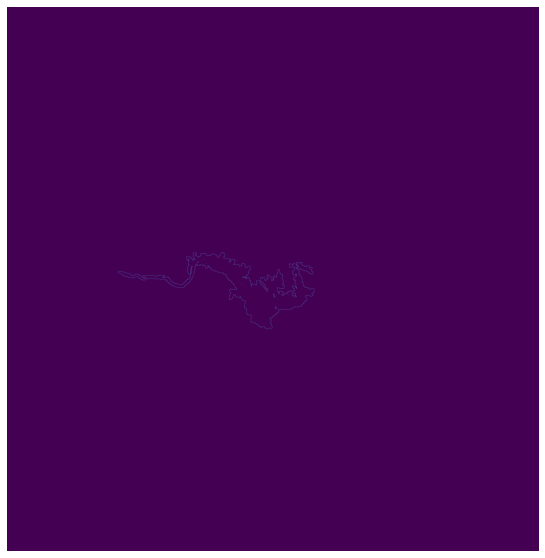

In [ ]:
ndwi_components_2 = img_to_array(ndwi_components_2)
save_img('image_save_ndwi_components_2.jpg', ndwi_components_2)
image_ndwi_components_2 = cv2.imread('image_save_ndwi_components_2.jpg')

img_blur_ndwi_components_2 = cv2.GaussianBlur(
    image_ndwi_components_2, (3, 3), 0)
canny_ndwi_components_2 = cv2.Canny(img_blur_ndwi_components_2, 240, 250)
canny_ndwi_components_image = img_to_array(canny_ndwi_components_2)
save_img("image_save_ndwi_canny_edge_2.png", canny_ndwi_components_image)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(canny_ndwi_components_2)
